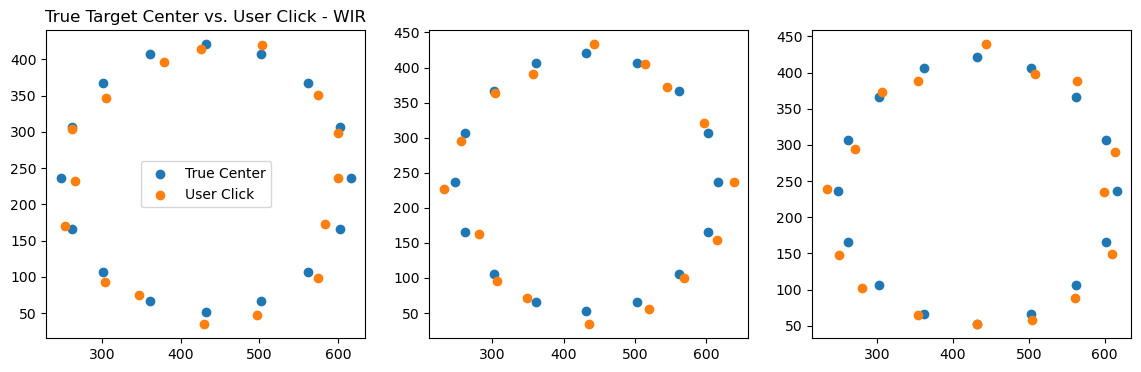

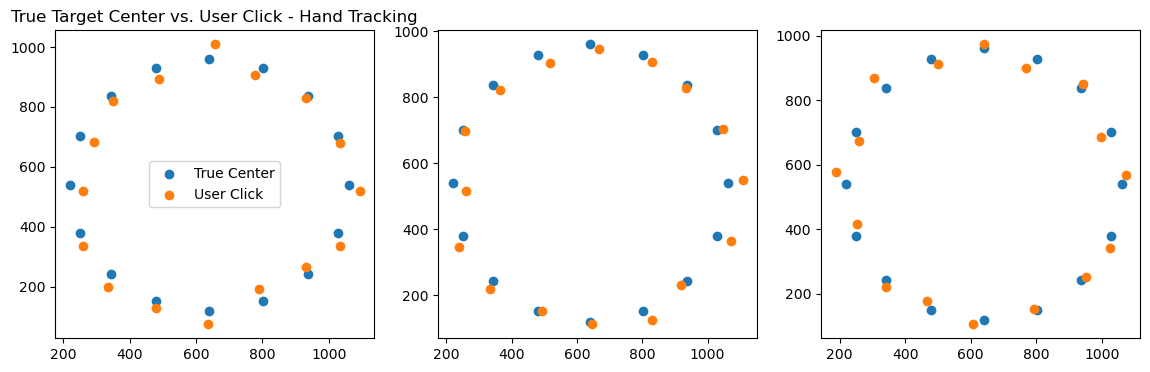

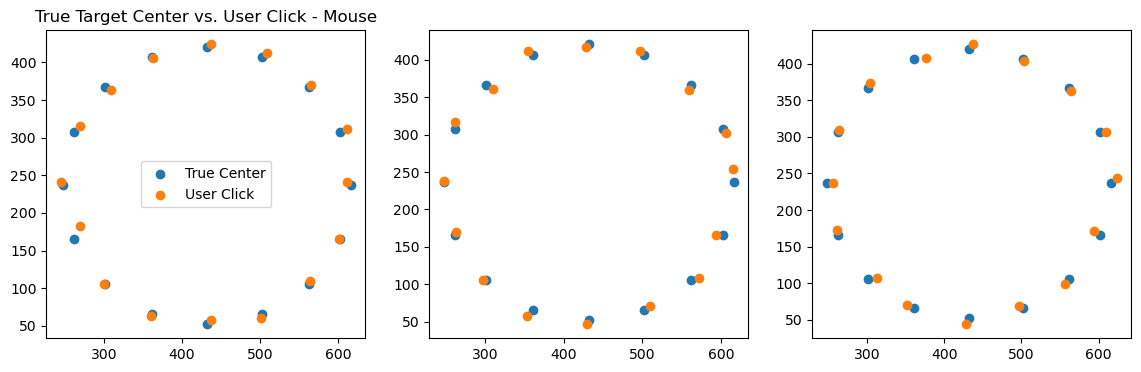

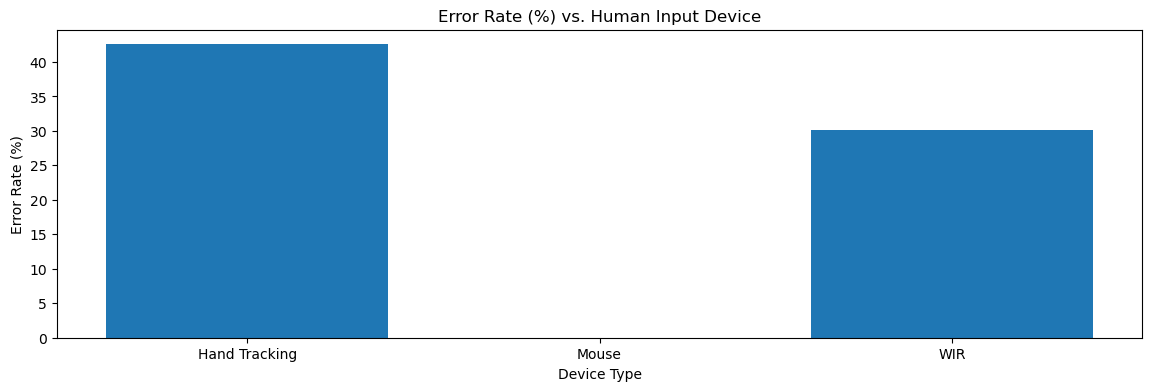

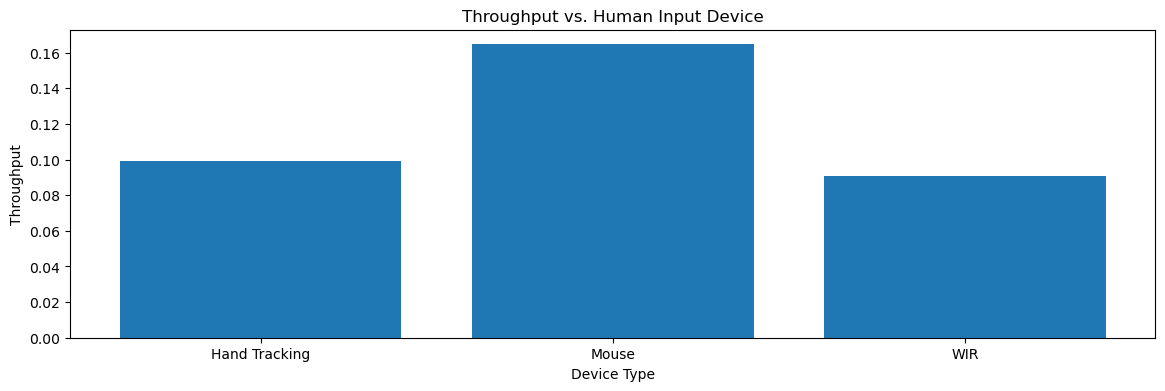

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

click_cols = ['Click Location X','Click Location Y','Center Location X','Center Location Y']
HT1_df = pd.read_csv('HandTrackingTest1.csv', sep=',')
HT2_df = pd.read_csv('HandTrackingTest2.csv', sep=',')
HT3_df = pd.read_csv('HandTrackingTest3.csv', sep=',')

TP1_df = pd.read_csv('TrackpadTest1.csv', sep=',')
TP2_df = pd.read_csv('TrackpadTest2.csv', sep=',')
TP3_df = pd.read_csv('TrackpadTest3.csv', sep=',')

M1_df = pd.read_csv('MouseTest1.csv', sep=',')
M2_df = pd.read_csv('MouseTest2.csv', sep=',')
M3_df = pd.read_csv('MouseTest3.csv', sep=',')

plt.rcParams["figure.figsize"] = (14,4) 
plt.subplot(1,3,1)
plt.title("True Target Center vs. User Click - WIR")
plt.scatter(TP1_df['Center Location X'], TP1_df['Center Location Y'])
plt.scatter(TP1_df['Click Location X'], TP1_df['Click Location Y'])
plt.legend(['True Center', 'User Click'])

plt.subplot(1,3,2)
plt.scatter(TP2_df['Center Location X'], TP2_df['Center Location Y'])
plt.scatter(TP2_df['Click Location X'], TP2_df['Click Location Y'])

plt.subplot(1,3,3)
plt.scatter(TP3_df['Center Location X'], TP3_df['Center Location Y'])
plt.scatter(TP3_df['Click Location X'], TP3_df['Click Location Y'])

plt.show()

plt.rcParams["figure.figsize"] = (14,4) 
plt.subplot(1,3,1)
plt.title("True Target Center vs. User Click - Hand Tracking")
plt.scatter(HT1_df['Center Location X'], HT1_df['Center Location Y'])
plt.scatter(HT1_df['Click Location X'], HT1_df['Click Location Y'])
plt.legend(['True Center', 'User Click'])

plt.subplot(1,3,2)
plt.scatter(HT2_df['Center Location X'], HT2_df['Center Location Y'])
plt.scatter(HT2_df['Click Location X'], HT2_df['Click Location Y'])

plt.subplot(1,3,3)
plt.scatter(HT3_df['Center Location X'], HT3_df['Center Location Y'])
plt.scatter(HT3_df['Click Location X'], HT3_df['Click Location Y'])

plt.show()

plt.rcParams["figure.figsize"] = (14,4) 
plt.subplot(1,3,1)
plt.legend(['True Center', 'User Click'])
plt.title("True Target Center vs. User Click - Mouse")
plt.scatter(M1_df['Center Location X'], M1_df['Center Location Y'])
plt.scatter(M1_df['Click Location X'], M1_df['Click Location Y'])
plt.legend(['True Center', 'User Click'])

plt.subplot(1,3,2)
plt.scatter(M2_df['Center Location X'], M2_df['Center Location Y'])
plt.scatter(M2_df['Click Location X'], M2_df['Click Location Y'])

plt.subplot(1,3,3)
plt.scatter(M3_df['Center Location X'], M3_df['Center Location Y'])
plt.scatter(M3_df['Click Location X'], M3_df['Click Location Y'])

plt.show()

mt_er_cols = ['Movement Time', 'Target Missed', 'Target Hit']
HTD1_df = pd.read_csv('HandTrackingMTandERData1.csv', sep=',', names=mt_er_cols)
HTD2_df = pd.read_csv('HandTrackingMTandERData2.csv', sep=',', names=mt_er_cols)
HTD3_df = pd.read_csv('HandTrackingMTandERData3.csv', sep=',', names=mt_er_cols)

MD1_df = pd.read_csv('MouseMTandERData1.csv', sep=',', names=mt_er_cols)
MD2_df = pd.read_csv('MouseMTandERData2.csv', sep=',', names=mt_er_cols)
MD3_df = pd.read_csv('MouseMTandERData3.csv', sep=',', names=mt_er_cols)

TPD1_df = pd.read_csv('TrackpadMTandERData1.csv', sep=',', names=mt_er_cols)
TPD2_df = pd.read_csv('TrackpadMTandERData2.csv', sep=',', names=mt_er_cols)
TPD3_df = pd.read_csv('TrackpadMTandERData3.csv', sep=',', names=mt_er_cols)

# print(mt_er_df)


hand_tracking_ER1 = (HTD1_df['Target Missed'][0] / (HTD1_df['Target Missed'][0] + HTD1_df['Target Hit'][0]))*100
hand_tracking_ER2 = (HTD2_df['Target Missed'][0] / (HTD2_df['Target Missed'][0] + HTD2_df['Target Hit'][0]))*100
hand_tracking_ER3 = (HTD3_df['Target Missed'][0] / (HTD3_df['Target Missed'][0] + HTD3_df['Target Hit'][0]))*100
ave_hand_tracking_ER = (hand_tracking_ER1 + hand_tracking_ER2 + hand_tracking_ER3)/3
#print(ave_hand_tracking_ER)

mouse_ER1 = (MD1_df['Target Missed'][0] / (MD1_df['Target Missed'][0] + MD1_df['Target Hit'][0]))*100
mouse_ER2 = (MD2_df['Target Missed'][0] / (MD2_df['Target Missed'][0] + MD2_df['Target Hit'][0]))*100
mouse_ER3 = (MD3_df['Target Missed'][0] / (MD3_df['Target Missed'][0] + MD3_df['Target Hit'][0]))*100
ave_mouse_ER = (mouse_ER1 + mouse_ER2 + mouse_ER3)/3
#print(ave_mouse_ER)

trackpad_ER1 = (TPD1_df['Target Missed'][0] / (TPD1_df['Target Missed'][0] + TPD1_df['Target Hit'][0]))*100
trackpad_ER2 = (TPD2_df['Target Missed'][0] / (TPD2_df['Target Missed'][0] + TPD2_df['Target Hit'][0]))*100
trackpad_ER3 = (TPD3_df['Target Missed'][0] / (TPD3_df['Target Missed'][0] + TPD3_df['Target Hit'][0]))*100
ave_trackpad_ER = (trackpad_ER1 + trackpad_ER2 + trackpad_ER3)/3
#print(ave_trackpad_ER)

error_rate_list = [ave_hand_tracking_ER, ave_mouse_ER, ave_trackpad_ER]
device_list = [1, 2, 3]
labels = ["Hand Tracking", "Mouse", "WIR"]
 
plt.bar(device_list, error_rate_list)
plt.xticks(device_list, labels)
plt.title("Error Rate (%) vs. Human Input Device")
plt.xlabel("Device Type")
plt.ylabel("Error Rate (%)")
plt.show()

# #path distance is found using the center location of the two points on the y-axis. This distance is
# #the diameter of the circle
hololens_path_distance = HT1_df['Center Location X'][0] - HT1_df['Center Location X'][1]
computer_path_distance = TP1_df['Center Location X'][0] - TP1_df['Center Location X'][1]
# print(path_distance)

# #radius of the circle is the value used to calculate effective width of target
radius = 40.950

HT_Ave_MT = (HTD1_df['Movement Time'][0] + HTD2_df['Movement Time'][0] + HTD3_df['Movement Time'][0])/3
HT_ID = math.log2((hololens_path_distance/(radius*2)) + 1)
HT_throughput = HT_ID/HT_Ave_MT
#print(HT_throughput)

M_Ave_MT = (MD1_df['Movement Time'][0] + MD2_df['Movement Time'][0] + MD3_df['Movement Time'][0])/3
M_ID = math.log2((computer_path_distance/(radius*2)) + 1)
M_throughput = M_ID/M_Ave_MT
#print(M_throughput)

TP_Ave_MT = (TPD1_df['Movement Time'][0] + TPD2_df['Movement Time'][0] + TPD3_df['Movement Time'][0])/3
TP_ID = math.log2((computer_path_distance/(radius*2)) + 1)
TP_throughput = TP_ID/TP_Ave_MT
#print(TP_throughput)

throughput_list = [HT_throughput, M_throughput, TP_throughput]

plt.bar(device_list, throughput_list)
plt.xticks(device_list, labels)
plt.title("Throughput vs. Human Input Device")
plt.xlabel("Device Type")
plt.ylabel("Throughput")
plt.show()


